In [10]:
import numpy as np
import pandas as pd

from sympy.solvers import solve
from sympy import Symbol
import scipy.stats as sstats

from utils import SimulateData, joyplot

import matplotlib.pyplot as plt
from matplotlib import cm

In [13]:
def plot_RTs_per_SSD(sim_data):

    SSDs = sim_data.SSD.unique()
    SSDs = [i for i in SSDs if i==i]
    SSDs.sort()
    RT_dist_dict = {ssd: [] for ssd in SSDs}
    for ssd in SSDs:
        RT_dist_dict[ssd] = sim_data.query(
            f"SSD == {ssd}"
        ).stopRT.values

    go_RTs = sim_data.query(
            f"condition == 'go'"
        ).goRT.values

    RT_dist_dict.update({-1:go_RTs})

    max_RT = np.nanmax([np.nanmax(RT_dist_dict[key]) for key in RT_dist_dict])

    bins = np.arange(0, max_RT, 5)

    RT_by_SSD_df = pd.DataFrame({ key:pd.Series(value) for key, value in RT_dist_dict.items()})
    RT_by_SSD_df = RT_by_SSD_df.reindex(sorted(RT_by_SSD_df.columns), axis=1)
    rt_by_SSD_melt = RT_by_SSD_df.melt(value_vars=RT_by_SSD_df.columns, var_name='SSD', value_name='RT')

    fig, axes = joyplot(rt_by_SSD_melt, by="SSD", column="RT", range_style='own',
                        grid='y',
                        linewidth=1, legend=False, figsize=(8,8),
                        title="RT Distribution by trial type / SSD",
                        bins=bins,
                        hist=True,
                        density=True,
                        ylim='own',
                        colormap=cm.autumn_r,
                        fade=True)
    plt.show()
    plt.close()

# Simulate 1 subject

In [5]:
params = {'mu_go': .2,
        'mu_stop': .65,
        'noise_go': 1,
        'noise_stop': 1.3,
        'threshold':95,
        'nondecision_go':50,
        'nondecision_stop':50,
        'inhibition_interaction':.5, 
        'SSDs':[0, 50, 100, 150, 200, 250, 300, 350, 400, 450, 500],
        'n_trials':1000,
        'max_time':1000,
        'p_trigger_fail': 0,
        'p_guess': 0,
        'guess_function': lambda x: np.random.uniform(200, 400, x),
       }
simulator = SimulateData()
sim_data = simulator.simulate(params)

/Users/henrymj/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:18: RuntimeWarning: All-NaN slice encountered
/Users/henrymj/Documents/ABCD_simulations/utils.py:529: UserWarning: At least a column/group has no numeric values.
  warn("At least a column/group has no numeric values.")
/Users/henrymj/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:908: RuntimeWarning: invalid value encountered in true_divide
  return n/db/n.sum(), bin_edges
/Users/henrymj/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:908: RuntimeWarning: invalid value encountered in true_divide
  return n/db/n.sum(), bin_edges
/Users/henrymj/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:908: RuntimeWarning: invalid value encountered in true_divide
  return n/db/n.sum(), bin_edges


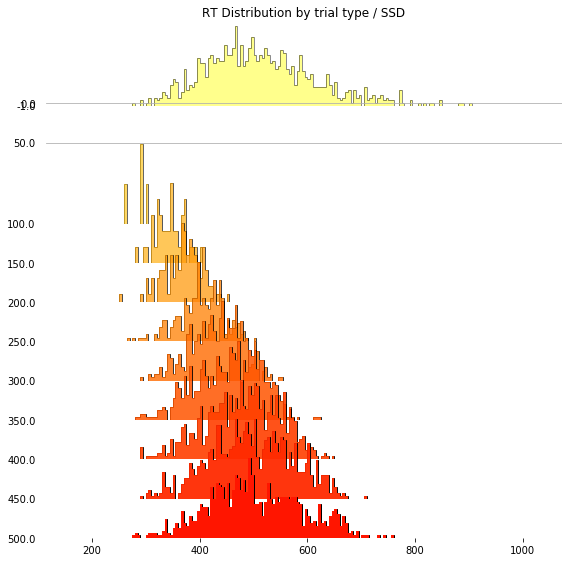

In [14]:
plot_RTs_per_SSD(sim_data)

# Simulate a group

In [12]:
NSUBS = 10
subjects = np.arange(0, NSUBS)

group_data = pd.DataFrame()
for subject in subjects:
    params = {
        'mu_go': np.random.normal(.2, scale=.03),
        'mu_stop': np.random.normal(.65, scale=.03),
        'n_trials': 100
    }
    data = simulator.simulate(params)
    data['ID'] = subject
    group_data = pd.concat([group_data, data], 0)

/Users/henrymj/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:18: RuntimeWarning: All-NaN slice encountered
/Users/henrymj/Documents/ABCD_simulations/utils.py:529: UserWarning: At least a column/group has no numeric values.
  warn("At least a column/group has no numeric values.")
/Users/henrymj/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:908: RuntimeWarning: invalid value encountered in true_divide
  return n/db/n.sum(), bin_edges
/Users/henrymj/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:908: RuntimeWarning: invalid value encountered in true_divide
  return n/db/n.sum(), bin_edges


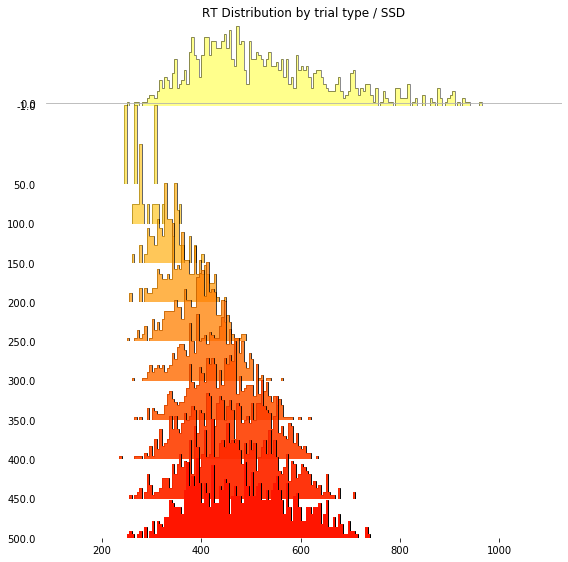

In [15]:
plot_RTs_per_SSD(group_data)